In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output
from bindsnet.models import DiehlAndCook2015
from bindsnet.network.monitors import Monitor
from bindsnet.encoding import poisson
from encoder import *
plt.rcParams["figure.figsize"] = (20, 20)

In [2]:
time = 500
network = DiehlAndCook2015(100*100*2, dt=1.0, norm=2000, inh=3)
exc_monitor = Monitor(network.layers['Ae'], ['v', 's'], time=time)
network.add_monitor(exc_monitor, name='exc')

In [3]:
track1 = pickle.load(open('test.p', 'rb'))

In [4]:
def detect(spikes):
    cols = torch.sum(spikes, dim=1)
    for i, v in enumerate(cols):
        if v != 0:
            print(i, v)

28 tensor(17.)
31 tensor(6.)
42 tensor(8.)
44 tensor(11.)
93 tensor(7.)


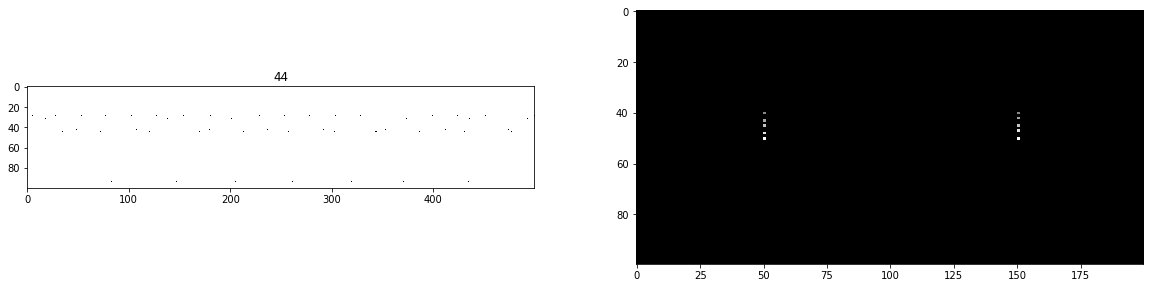

In [7]:
for i in range(1, len(track1)):
    try:
        orig = torch.cat((track1[i-1], track1[i]), dim=1)
        pt = orig.view(-1)
        pt = poisson(pt, time)
        
        inpts = {'X': pt}
        network.run(inpts=inpts, time=time)
        spikes = exc_monitor.get('s')
        
        detect(spikes)
        
        fig = plt.figure(figsize=(20, 20))
        plt.subplot(2, 2, 1)
        plt.title(f'{i}')
        plt.imshow(spikes, cmap='binary')
        plt.subplot(2, 2, 2)
        plt.imshow(orig, cmap='gist_gray')
        plt.show()
        
        clear_output(wait=True)
    except KeyboardInterrupt:
        break

In [6]:
network.save('trained.net')